<a href="https://colab.research.google.com/github/atulchander/Data-Visualisation-and-Exploiratory-Data-Analysis-EAD-by-using-Python/blob/main/For_GIT_Copy_of_Copy_of_PYF_Project_LearnerNotebook_FullCode_just_to_steal_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Google colab/PYTHON FOUNDATION/1. PROJECT 1: PYTHON FOUNDATIONS: FOOD HUB/foodhub_order.csv')
# returns the first 5 rows
df.head()

NameError: name 'pd' is not defined

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape #function shape informs abut number of rows and columns

(1898, 9)

#### Observations:
*   In this data, there are 1898 rows and 9 columns





### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info() #the function is for description of data

NameError: ignored

#### Observations:
There are 4 object datatype columns, and 5 numerical (float=1, int=4)   

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# checking missing values across each columns
df.isnull().sum()

NameError: ignored

#### Observations:

There are no missing values but 736 orders show as "Not given". I decide to not consider it as missing value because rating is a sensitive parameter and any of it's treatment will lead to false negatives or false positive associations / correlations.  


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe() # the funtion describe is to get the statistical summary.

NameError: ignored

#### Observations:

1.   Minimum time to food prepration after order placement is: 20 minutes
2.   Average time to food prepration after order placement is: 27.4 minutes
3.   Maximum time to food prepration after order placement is: 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# to check number of Zeros in rating column
df['rating'].isnull().sum()

0

In [ ]:
#To check unique data types in the column rating
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

###Calculating the number of not rated order

In [ ]:
# Filter the dataframe to only include rows where the rating is equal to 'not rated'
filtered_df = df[df['rating'] == 'Not given']
# Count the number of rows in the filtered dataframe
num_customers_not_rated = filtered_df.shape[0]
# Print the number of customers who have not rated a movie
print(num_customers_not_rated)

736


#### Observations:
736 Orders are not Rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

###To identify number of datatypes on each feature / column

In [ ]:
df['customer_id'].unique() #unique function is to identify number of datatypes on each feature / column

array([337525, 358141,  66393, ...,  97838, 292602, 397537])

In [ ]:
df['order_id'].unique()

array([1477147, 1477685, 1477070, ..., 1477819, 1477513, 1478056])

In [ ]:
df['food_preparation_time'].unique()

array([25, 23, 20, 28, 33, 21, 29, 34, 24, 30, 35, 32, 31, 27, 22, 26])

In [ ]:
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
df['delivery_time'].unique()

array([20, 23, 28, 15, 24, 21, 30, 26, 22, 17, 25, 16, 29, 27, 18, 31, 32,
       19, 33])

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
df['cost_of_the_order'].unique()

array([30.75, 12.08, 12.23, 29.2 , 11.59, 25.22,  6.07,  5.97, 16.44,
        7.18,  5.92,  8.1 , 24.3 , 11.3 , 12.13, 16.2 , 16.98, 33.03,
       14.12, 24.2 , 15.91, 29.1 ,  8.92, 15.86, 21.88, 14.02,  9.17,
       12.18, 31.33, 29.05,  8.39,  9.12, 15.47, 16.01, 29.83, 19.89,
       19.35, 33.22, 24.25, 22.75,  6.74, 13.78, 16.93, 29.39, 20.23,
       14.6 ,  6.79, 31.38,  8.34, 12.46, 14.55, 32.93,  8.  , 13.05,
        5.67, 29.29, 16.15, 13.34,  9.75,  6.69,  4.75, 12.56, 21.2 ,
       19.31, 16.3 , 25.27, 14.79,  5.72,  9.22, 16.39, 17.03, 21.83,
       31.29, 11.83, 22.26, 20.47, 15.81, 22.36,  8.68, 12.9 , 29.15,
        7.86, 16.1 , 12.95, 11.69, 12.32, 14.99, 10.38,  9.65,  5.77,
        9.56, 29.34, 11.16, 14.07, 22.8 , 15.23, 16.49,  8.83, 16.25,
       16.83, 10.24, 19.4 , 13.97, 13.  ,  8.49, 20.18, 19.59, 16.11,
       12.27, 13.39,  9.02, 15.33, 31.43, 29.35, 15.28,  9.6 ,  8.88,
       15.96,  8.05,  8.54,  7.23, 19.69,  9.27,  8.97, 11.64, 13.15,
        9.41,  9.07,

Observations: Only rating column has incomplete information because rating is not given by several customers. However, rest of the data seems good.

#HISTOGRAM AND BOXPLOTS

## Cuisine Type

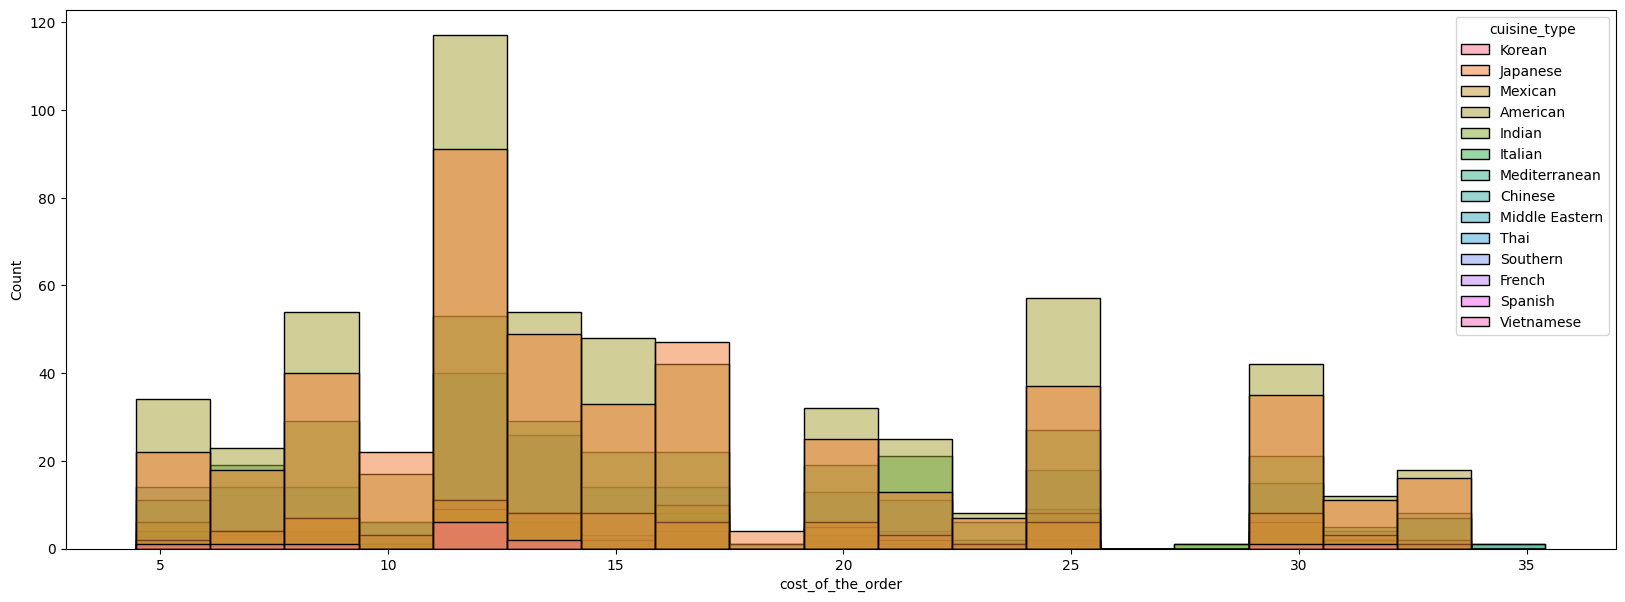

In [ ]:
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='cost_of_the_order', hue='cuisine_type')
plt.show()

Observations: Cost of the order

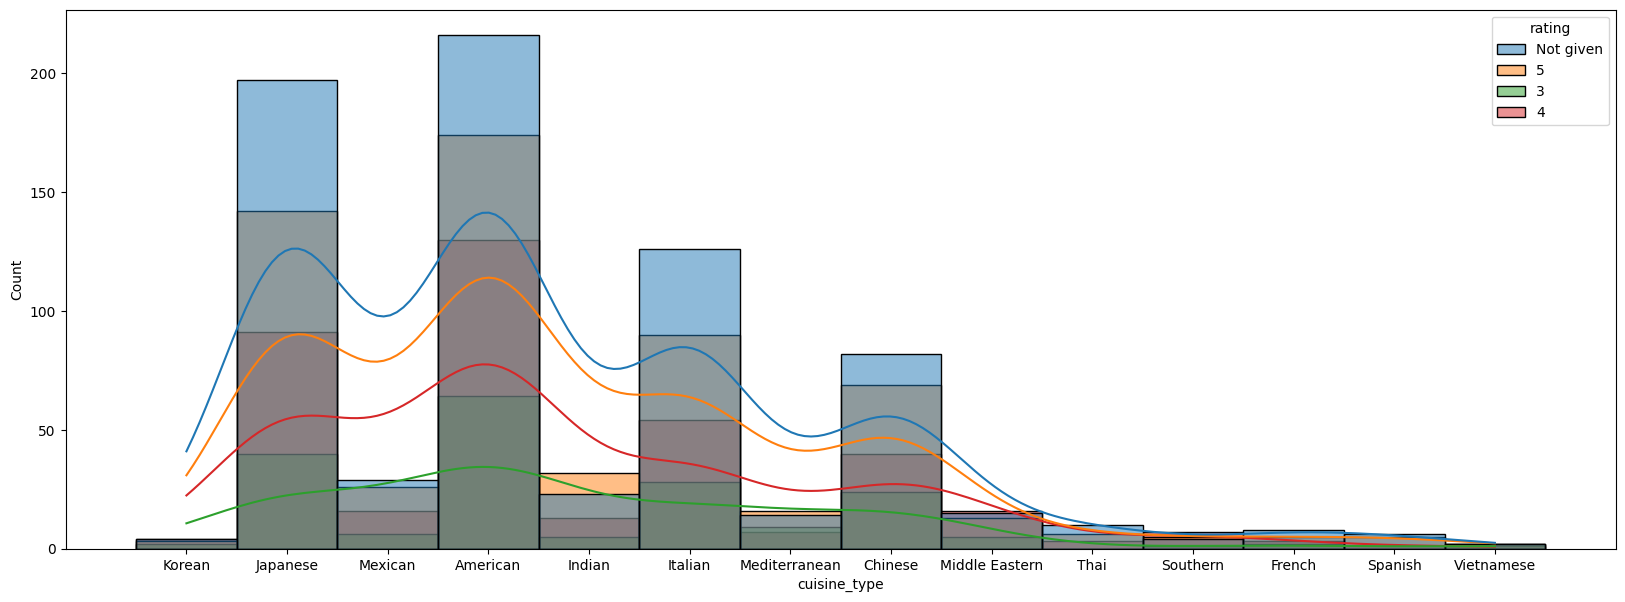

In [ ]:
plt.figure(figsize=(20, 7))
sns.histplot(data=df, x='cuisine_type', hue='rating', kde=True)
plt.show()


Observations: American cuisine is the most ordered but never got 5 stars.

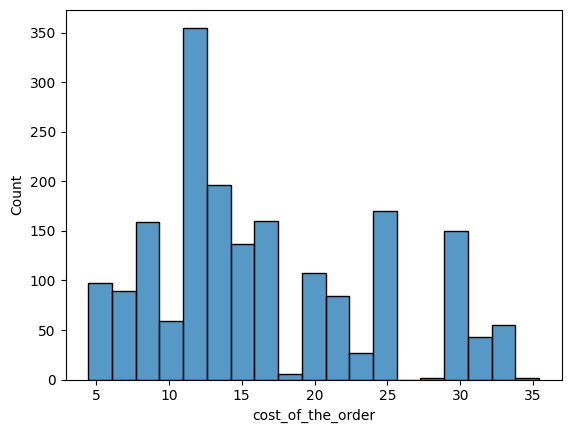

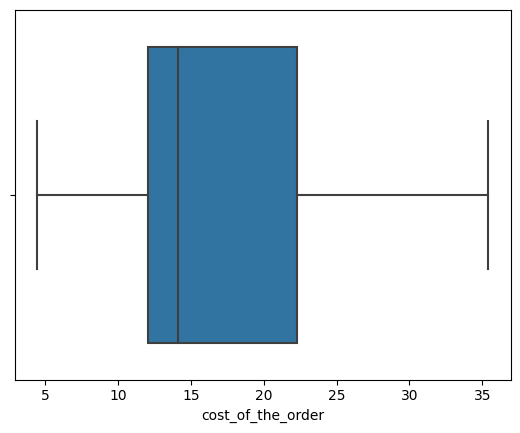

In [ ]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

Observation: Data is slightly right skewed.

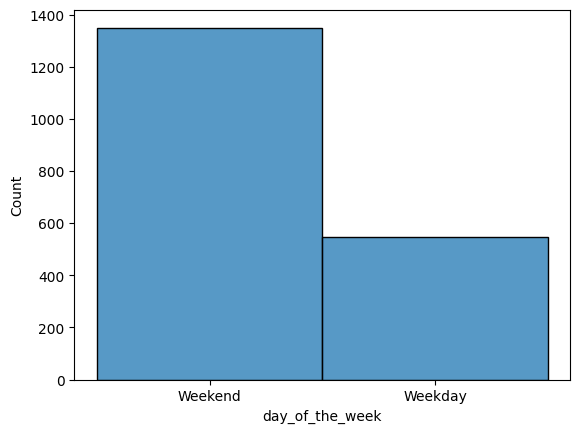

In [ ]:
sns.histplot(data=df,x='day_of_the_week')
plt.show()


Observations: Order counts during the weekend is obsereved extreamly high compared to the weekdays.

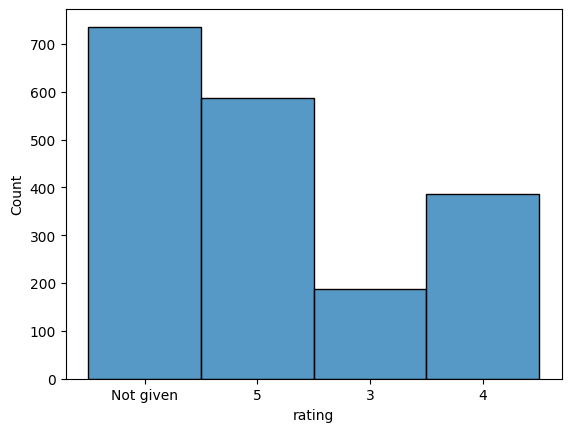

In [ ]:
sns.histplot(data=df,x='rating')
plt.show()

Observations: Highest counts are for the orders which are not given any rating by customers.`

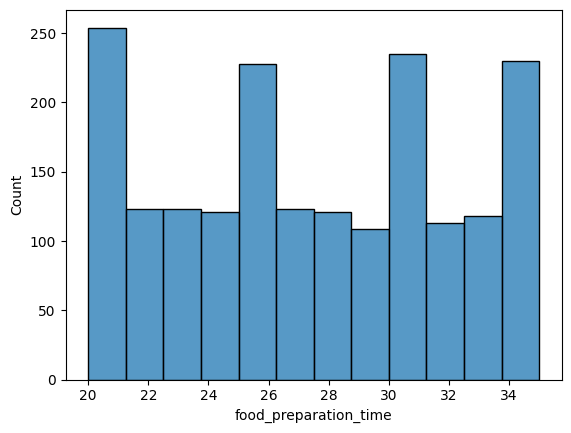

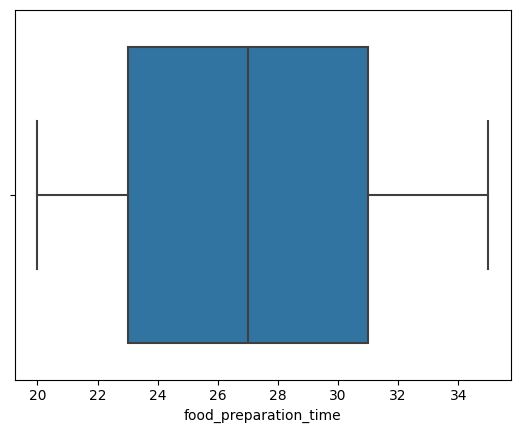

In [ ]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

Observations: Food Preparation time seems to have normal distrubution.

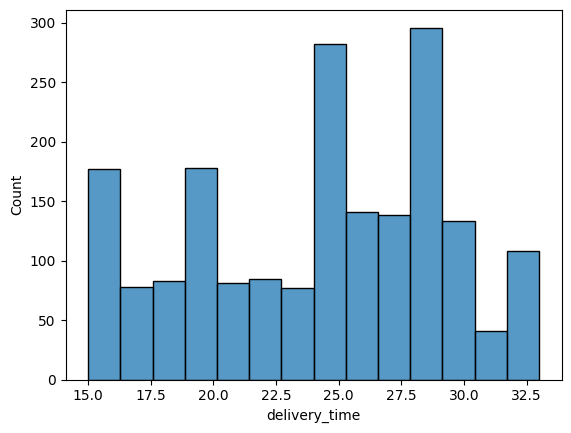

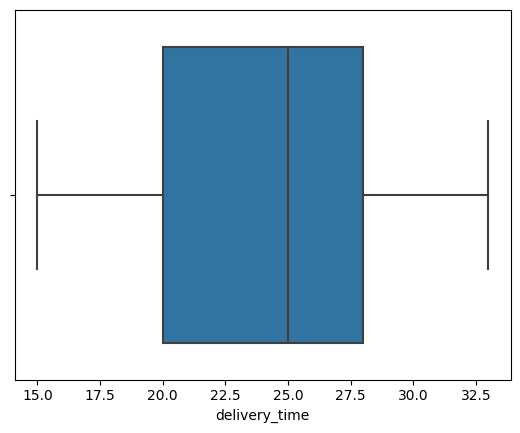

In [ ]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

Observations: The delivery time data is left skewed due to the orders that took more than 25 mins of time. So delivery time data needs closer look in downstream analysis (bivariate and multivariate analysis) to find out probable associations and correlations.

In [ ]:
plt.figure(figsize=(35, 7))
ax = sns.histplot(data=df, x='restaurant_name', hue='rating') # hue function is used to visulize the rating patterns
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

NameError: ignored

Observations: Here is the representation of number of orders with restaurants (x-axis) and y axis shows number of orders. The same time the plot also shows patterns or rating for their orders.

<ipython-input-267-0339fa4a2d8c>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


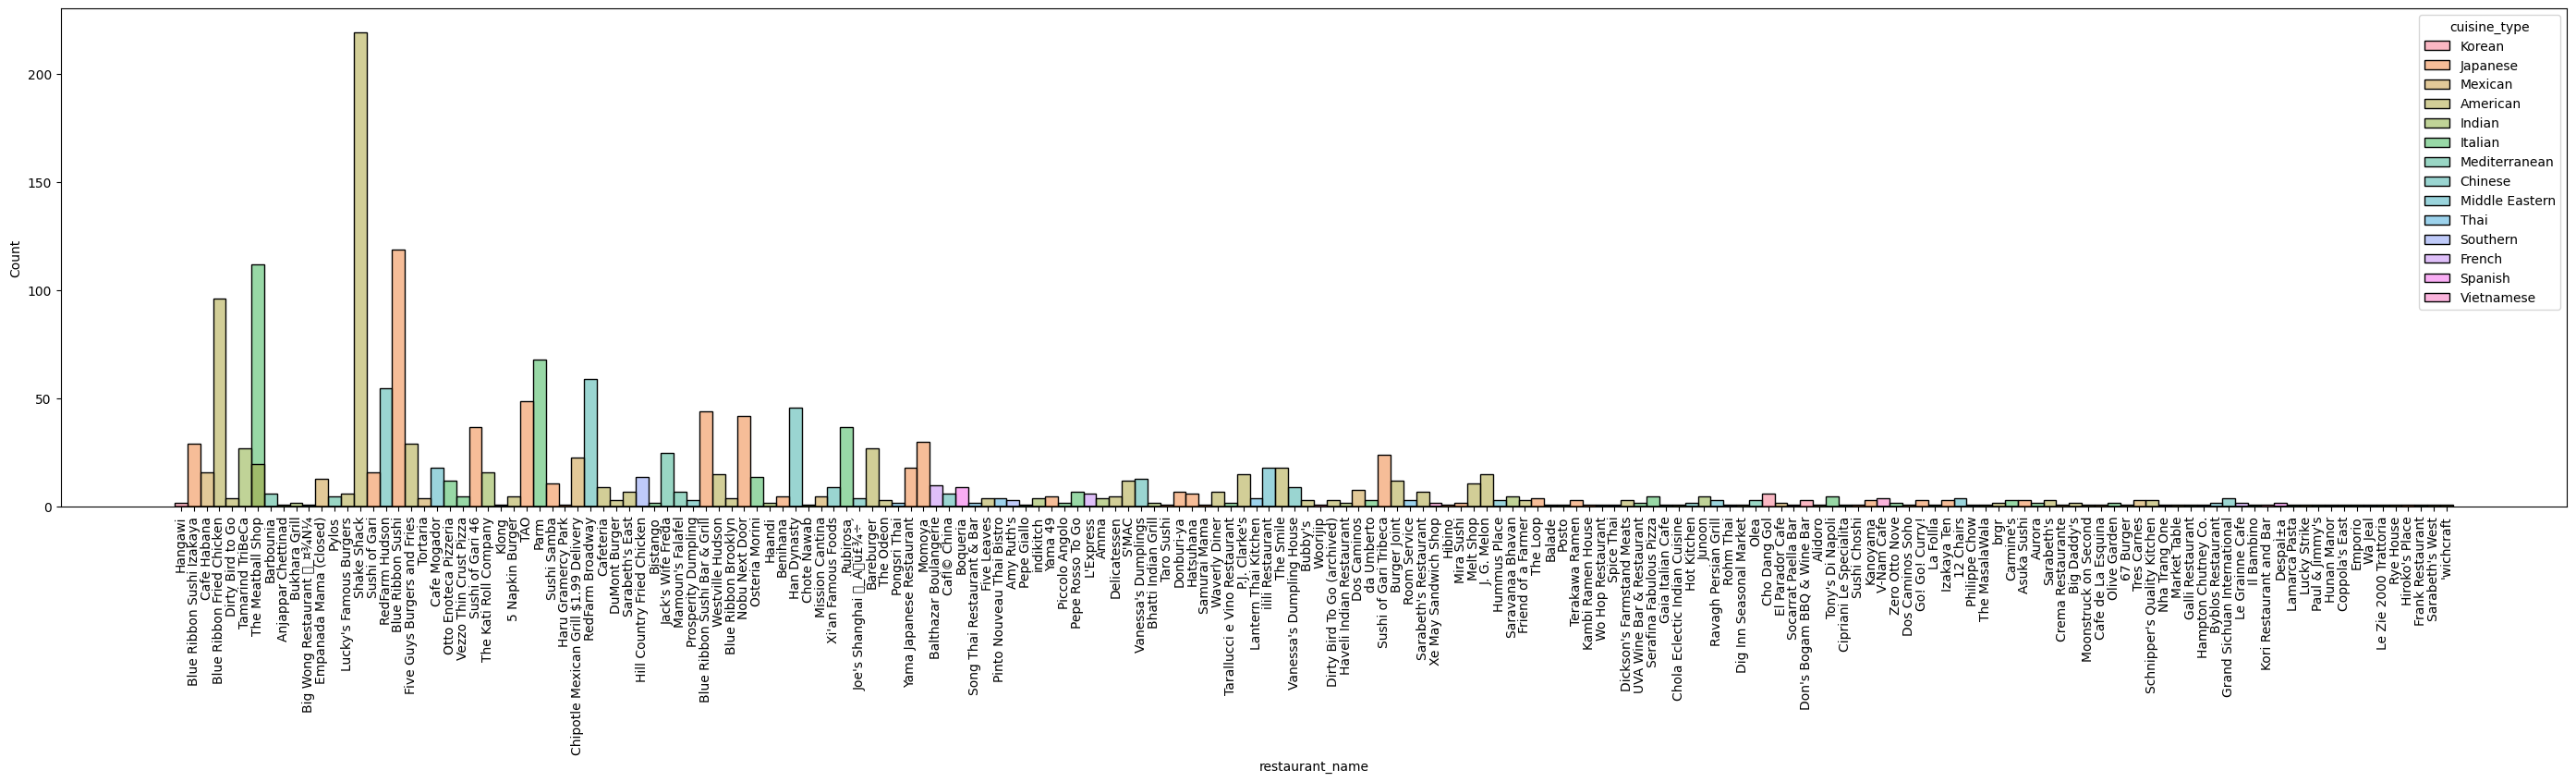

In [ ]:
plt.figure(figsize=(35, 7))
ax = sns.histplot(data=df, x='restaurant_name', hue='cuisine_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Observations: The plot shows what are the highest ordered restaourants and which cuisine they belong to.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# Group the dataframe by restaurant name and count the number of orders for each restaurant
df = df.groupby('restaurant_name')['order_id'].count().reset_index(name='num_orders')

# Sort the dataframe by the number of orders in descending order
df = df.sort_values(by='num_orders', ascending=False)

# Select the top 5 rows from the dataframe
top_5_restaurants = df.head(5)

# Print the top 5 restaurants
print(top_5_restaurants)

               restaurant_name  num_orders
136                Shake Shack         219
153          The Meatball Shop         132
21           Blue Ribbon Sushi         119
20   Blue Ribbon Fried Chicken          96
109                       Parm          68


#### Observations:

Shake Shack        =219;
The Meatball Shop=132;
Blue Ribbon Sushi=119;
Blue Ribbon Fried Chicken=96;
Parm=68;


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

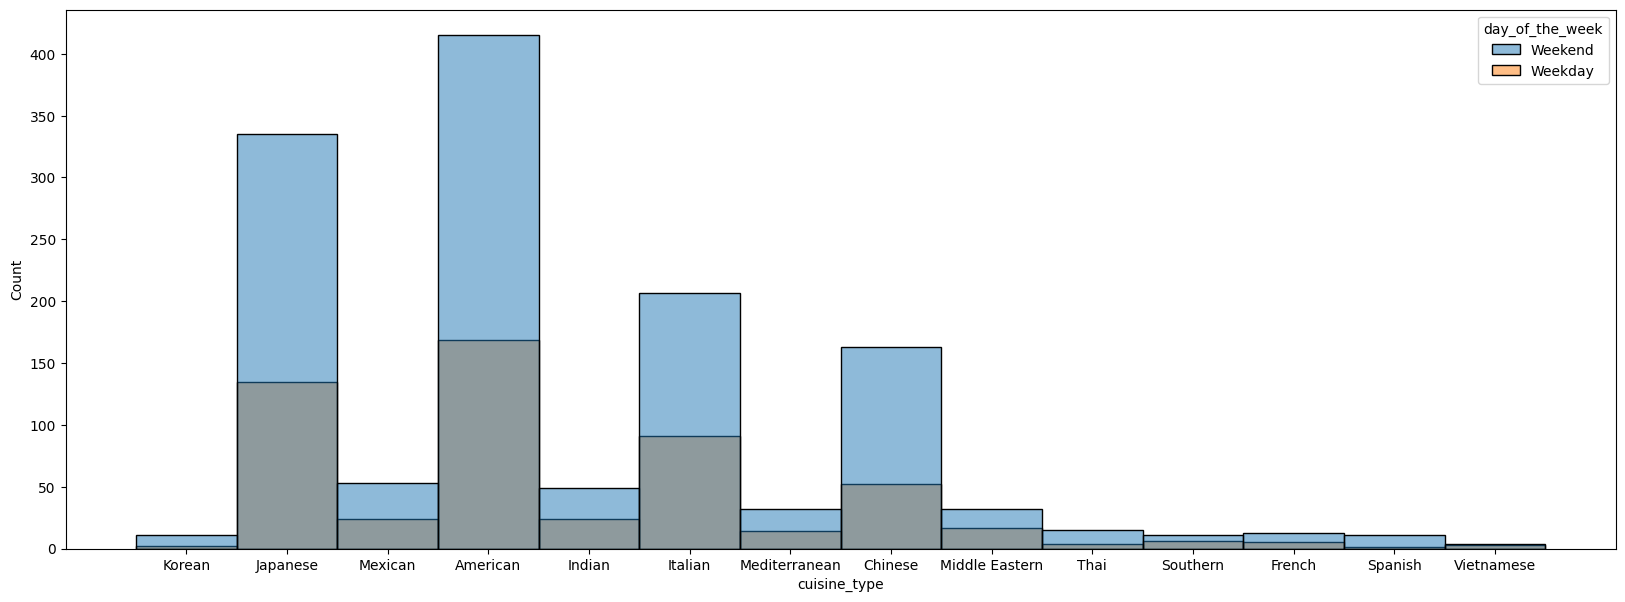

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Google colab/PYTHON FOUNDATION/1. PROJECT 1: PYTHON FOUNDATIONS: FOOD HUB/foodhub_order.csv')

plt.figure(figsize=(20,7)) #plots figure of size 20X7
sns.histplot(data=df,x='cuisine_type', hue='day_of_the_week')
plt.show()

In [ ]:
# Filter the DataFrame for weekend orders
weekend_orders = df[df['day_of_the_week'].isin(['Weekend'])]

# Count the occurrences of each cuisine
cuisine_counts = weekend_orders['cuisine_type'].value_counts()

# Find the most ordered cuisine
most_ordered_cuisine = cuisine_counts.idxmax()
most_ordered_count = cuisine_counts.max()

print(f"The most ordered cuisine over the weekend is '{most_ordered_cuisine}' with {most_ordered_count} orders.")

The most ordered cuisine over the weekend is 'American' with 415 orders.


In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations: American cuisine is the most popular during the weekend, with 415 total orders


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Filter the dataframe to only include orders that cost more than 20 dollars
df_filtered = df[df['cost_of_the_order'] > 20]

# Calculate the percentage of orders that cost more than 20 dollars
percentage_of_orders_above_20 = (len(df_filtered) / len(df)) * 100

# Print the percentage of orders that cost more than 20 dollars
print('Percentage of orders that cost more than 20 dollars:', percentage_of_orders_above_20)

Percentage of orders that cost more than 20 dollars: 29.24130663856691


#### Observations: 29.24130663856691


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations: 24.161749209694417


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Group the dataframe by customer ID and count the number of orders for each customer
df_grouped = df.groupby('customer_id')['order_id'].count().reset_index(name='num_orders')

# Sort the dataframe by the number of orders in descending order
df_grouped = df_grouped.sort_values(by='num_orders', ascending=False)

# Get the top 3 customers
top_3_customers = df_grouped.head(3)

# Print the IDs of the top 3 customers and the number of orders they placed
print(top_3_customers)

     customer_id  num_orders
116        52832          13
84         47440          10
333        83287           9


#### Observations: Customer ID 52832, 47440 and 83287 are the top 3 most frequent customers who ordered 13, 10 and 9 orders.


# Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


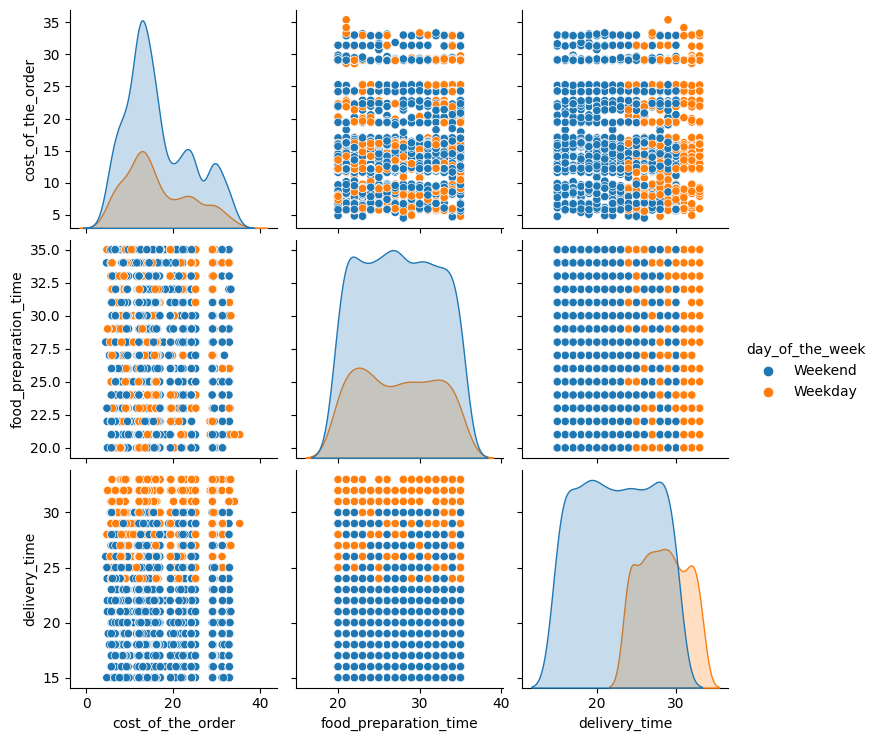

In [ ]:
sns.pairplot(data=df, vars=['cost_of_the_order','food_preparation_time', 'delivery_time'], hue= 'day_of_the_week'); # CORNER=TRUE FUNCTION IS TO Have only all plots once and not twice as above
#sns.pairplot(data=honeyprod, vars=['order_id','customer_id','restaurant_name','cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'rating','food_preparation_time ', 'delivery_time'], hue='yieldpercol',corner=True); # CORNER=TRUE FUNCTION IS TO Have only all plots once and not twice as above

Observations: The pairplot shows correlation between cost_of_the_order','food_preparation_time', and 'delivery_time'. And the hue function is used to check relation of day of the week with studied features.
In general, not strong correlation was obsereved in the studied parameters.

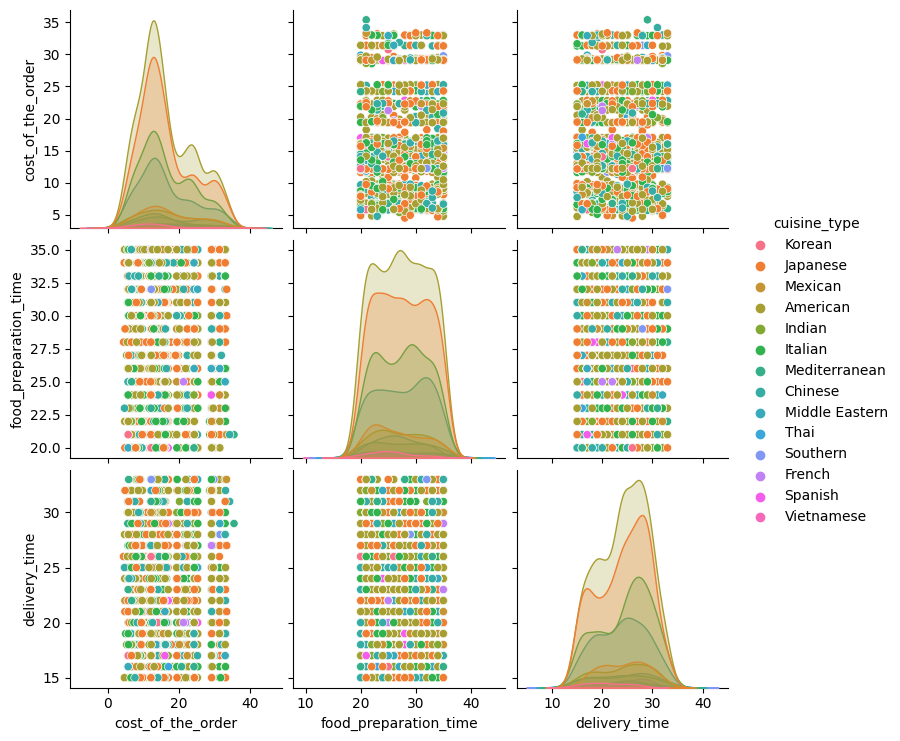

In [ ]:
sns.pairplot(data=df, vars=['cost_of_the_order','food_preparation_time', 'delivery_time'], hue= 'cuisine_type');

##Cuisine vs Cost of the order

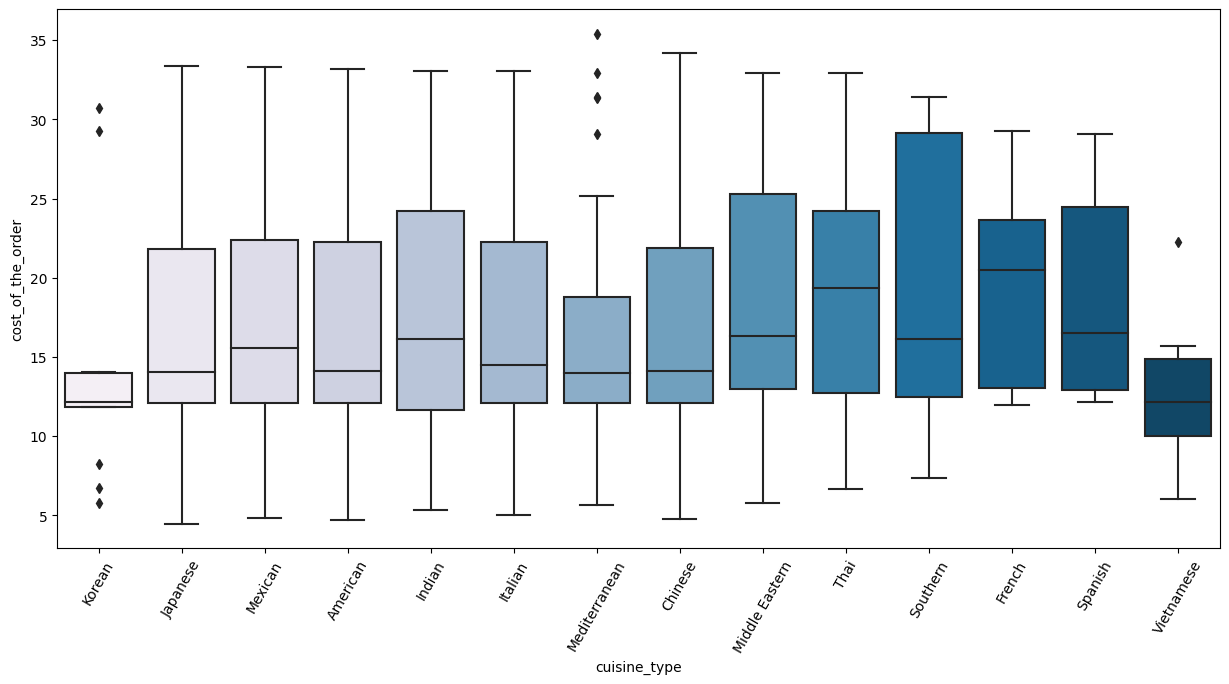

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order", palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Observations: The graph shows cost of order and it's relation to cuisine type

##Cuisine vs Food Preparation time

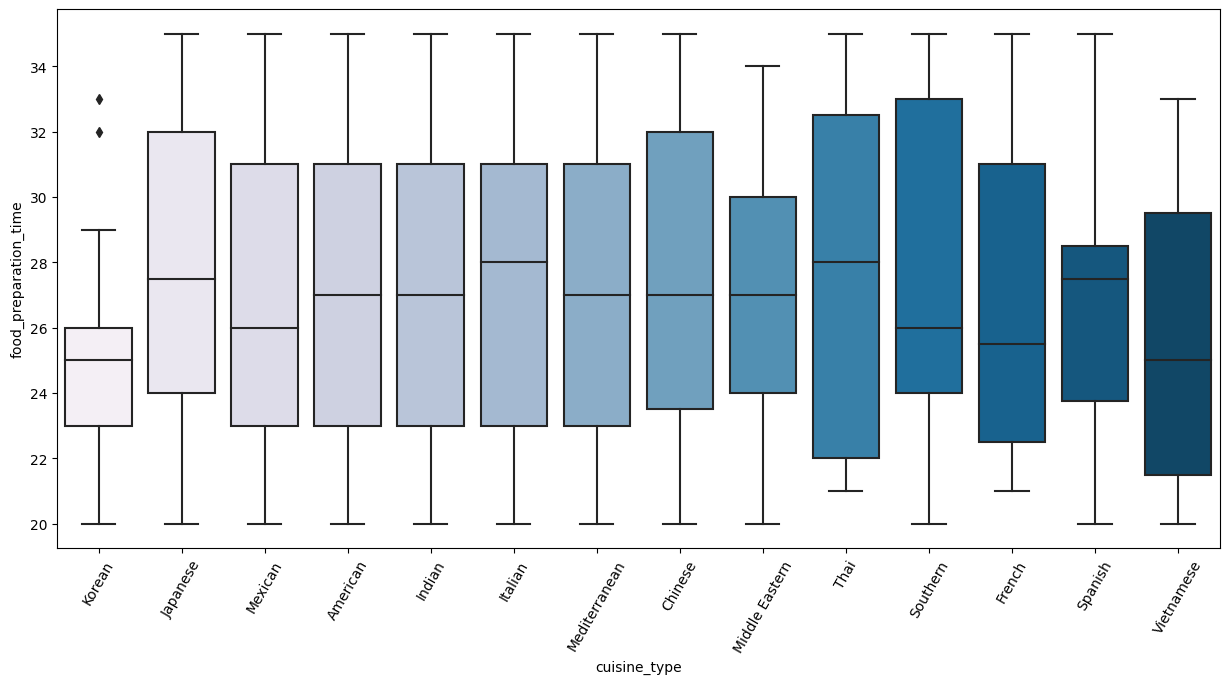

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot (x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()
#'order_id','customer_id','restaurant_name','cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'rating','food_preparation_time', 'delivery_time']

## Day of the Week vs Delivery time

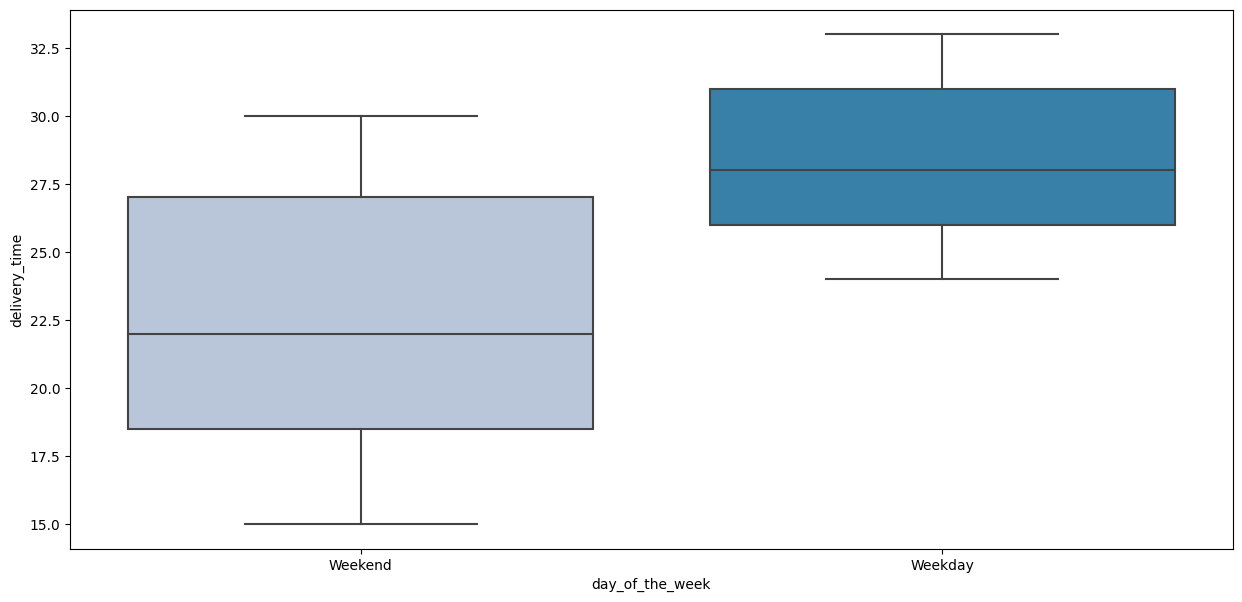

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot (x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

Observation: Delivery time is recorded more during the weekdays compared to weekend.

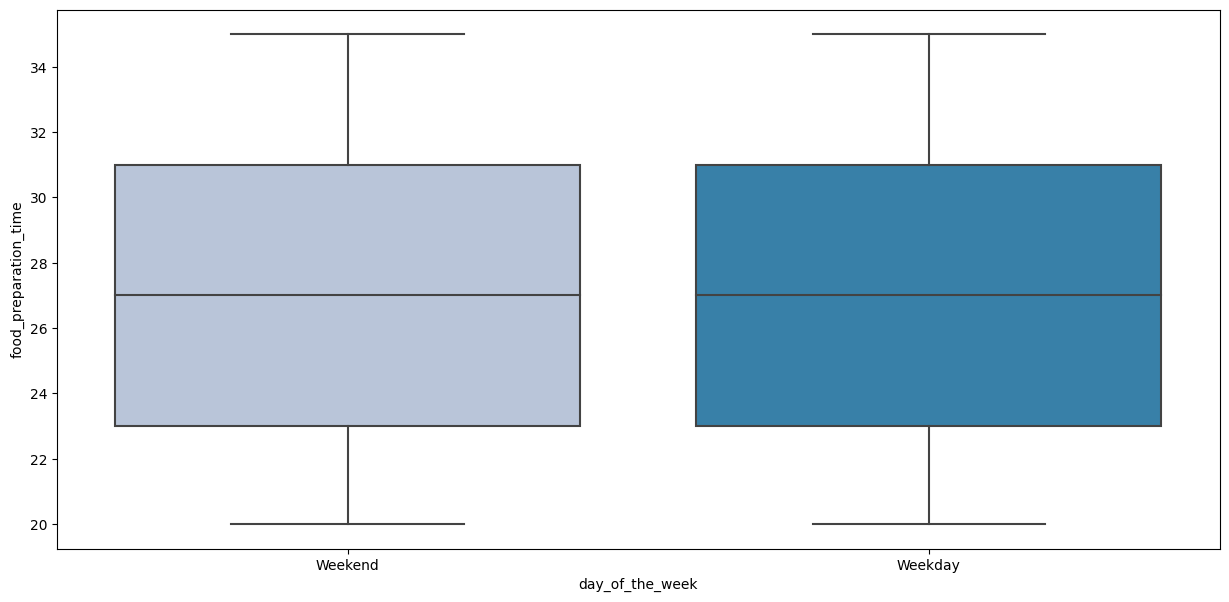

In [ ]:
# Relationship between day of the week and Food Preparation Time
plt.figure(figsize=(15,7))
sns.boxplot (x = "day_of_the_week", y = "food_preparation_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

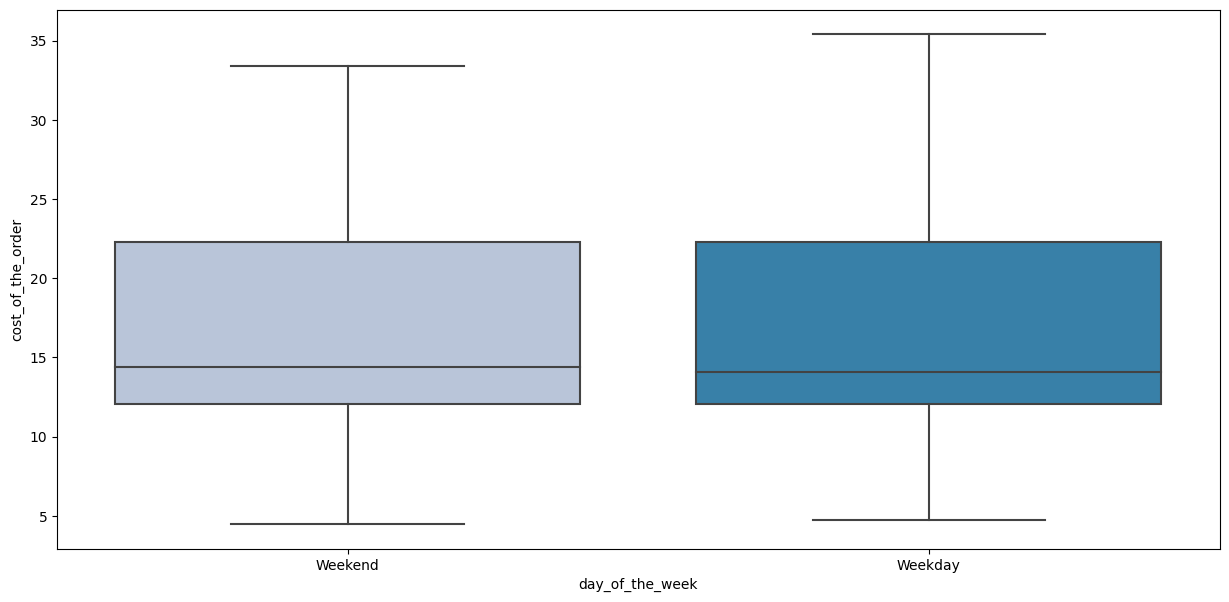

In [ ]:
# Relationship between day of the week and cost
plt.figure(figsize=(15,7))
sns.boxplot (x = "day_of_the_week", y = "cost_of_the_order", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

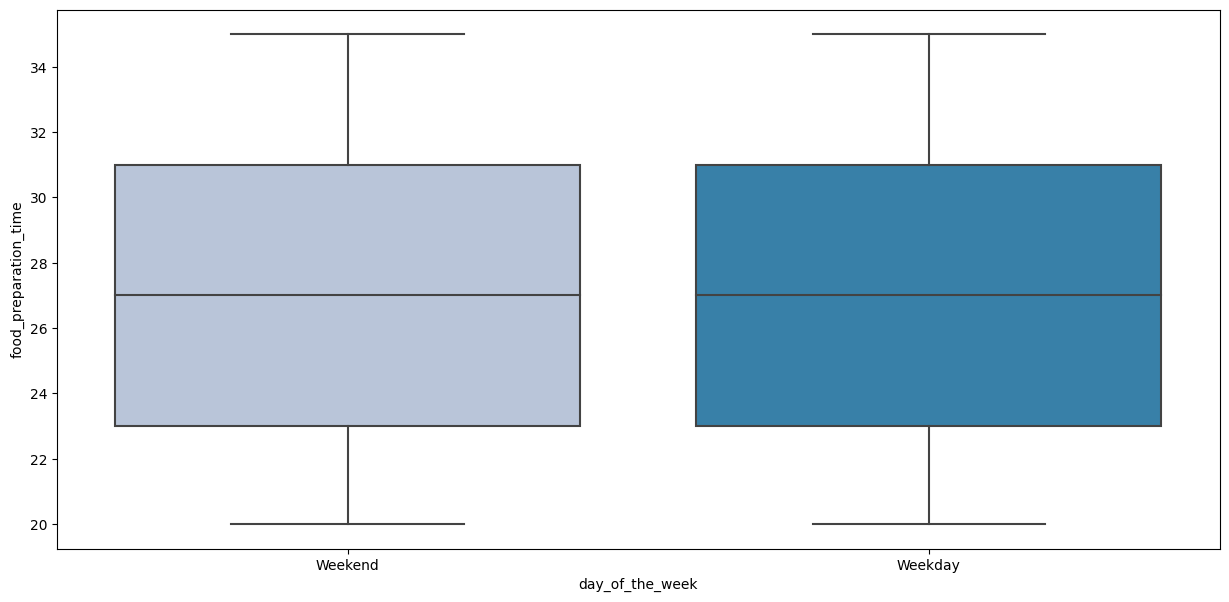

In [ ]:
# Relationship between day of the week and Food Preparation time
plt.figure(figsize=(15,7))
sns.boxplot (x = "day_of_the_week", y = "food_preparation_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                     3579.53
The Meatball Shop               2145.21
Blue Ribbon Sushi               1903.95
Blue Ribbon Fried Chicken       1662.29
Parm                            1112.76
RedFarm Broadway                 965.13
RedFarm Hudson                   921.21
TAO                              834.50
Han Dynasty                      755.29
Blue Ribbon Sushi Bar & Grill    666.62
Rubirosa                         660.45
Sushi of Gari 46                 640.87
Nobu Next Door                   623.67
Five Guys Burgers and Fries      506.47
Name: cost_of_the_order, dtype: float64

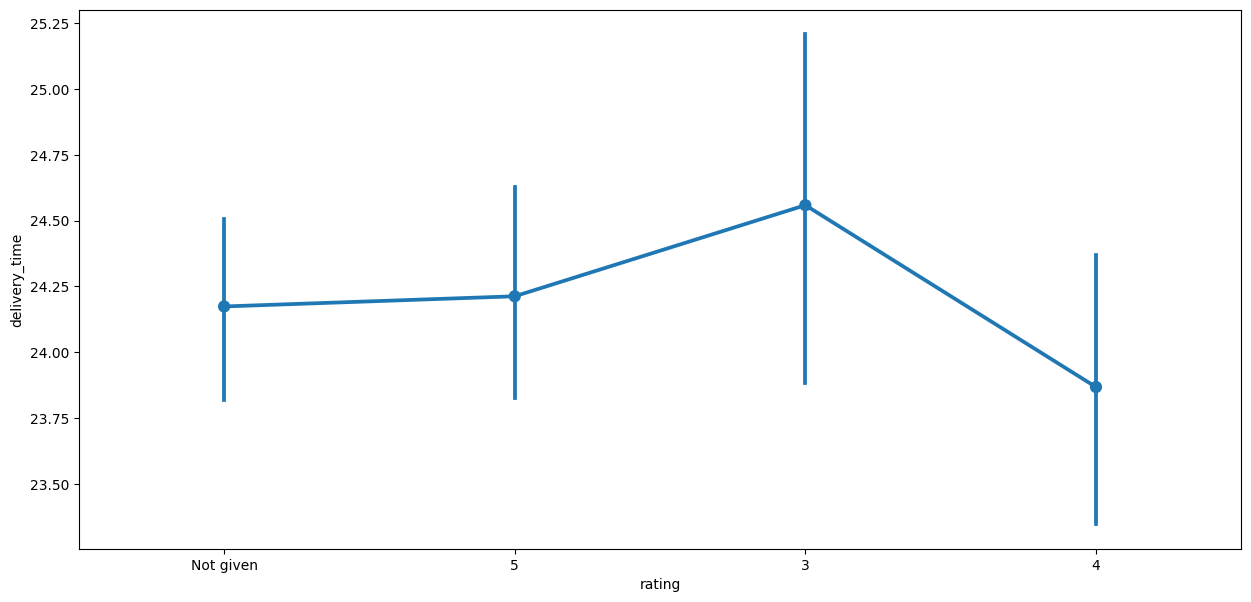

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

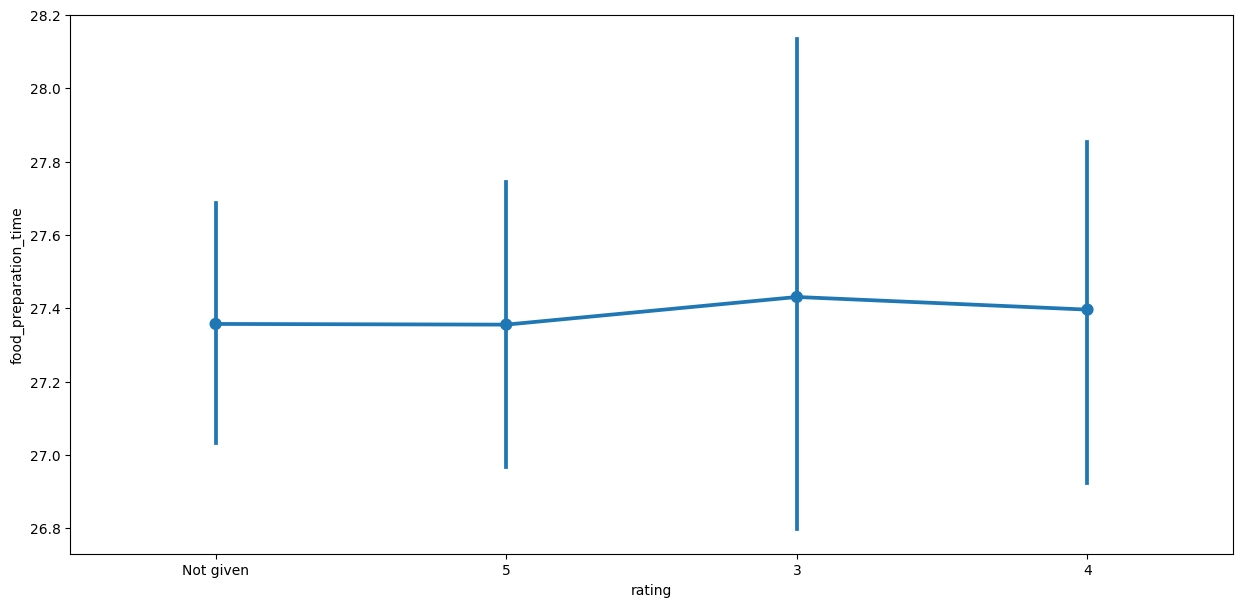

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

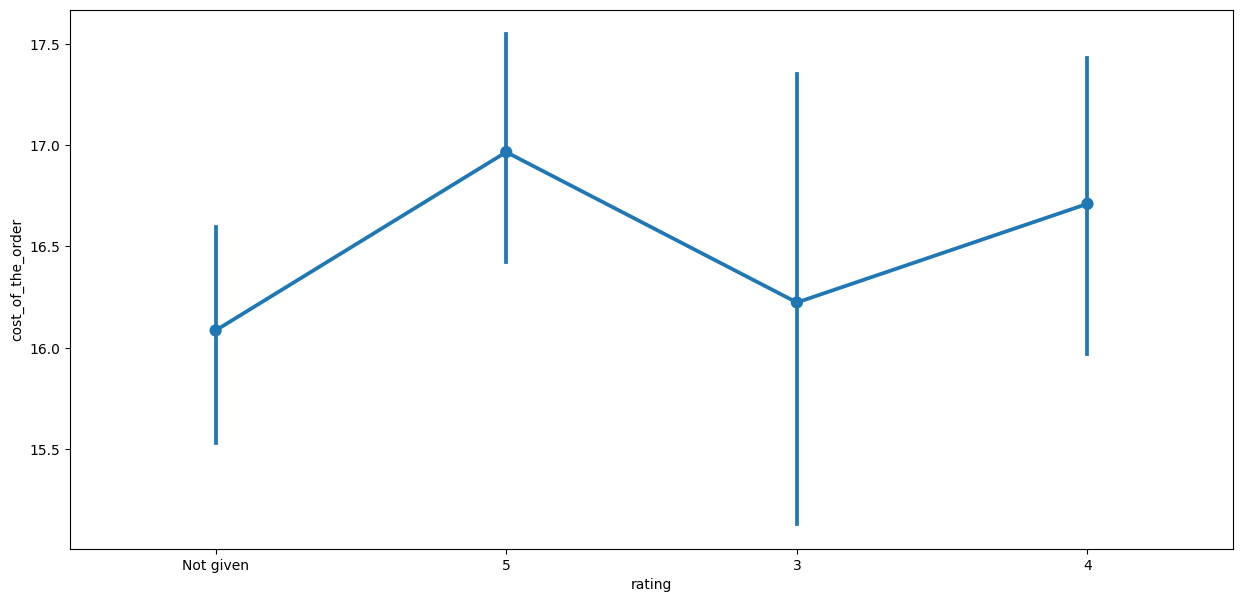

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

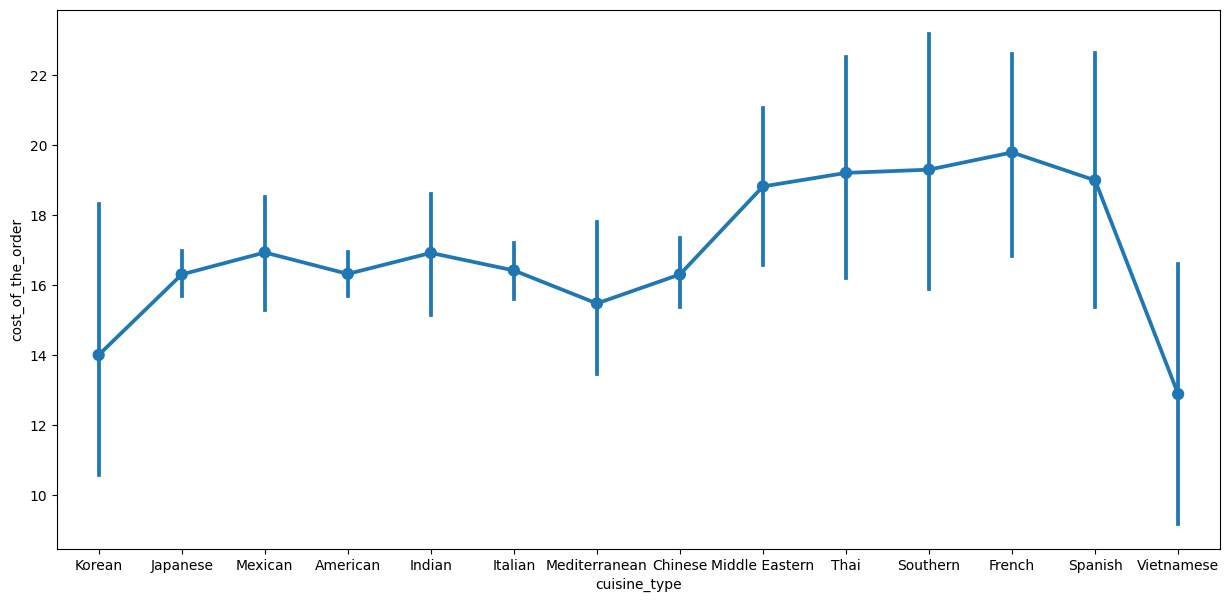

In [ ]:
# Relationship between cuisine type and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df)
plt.show()

#Correlation among variables

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10, 5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

NameError: ignored

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:


# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()



,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


#### Observations:


In [ ]:
# Get the restaurant names that have a rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have a rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()


,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#'order_id','customer_id','restaurant_name','cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'rating','food_preparation_time', 'delivery_time']


def compute_rev(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return x * 0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74


In [ ]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum()  # Calculate the sum of the 'Revenue' column to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')


The net revenue is around 6166.3 dollars


#### Observations: The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Find the percentage of orders with more than 60 minutes of total delivery time
total_orders = len(df)  # Total number of orders
orders_more_than_60_minutes = len(df[df['total_time'] > 60])  # Number of orders with total time > 60 minutes

percentage_orders_more_than_60_minutes = (orders_more_than_60_minutes / total_orders) * 100

print(f'The percentage of orders that take more than 60 minutes for delivery is: {percentage_orders_more_than_60_minutes:.2f}%')

The percentage of orders that take more than 60 minutes for delivery is: 10.54%


In [ ]:
df.head() #dataframe shows addition of another column with heading "total_time"

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74,49


#### Observations: The percentage of orders that take more than 60 minutes for delivery is: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time on weekdays and print it
weekday_mean_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print('The mean delivery time on weekdays is around', round(weekday_mean_delivery_time), 'minutes')

# Get the mean delivery time on weekends and print it
weekend_mean_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('The mean delivery time on weekends is around', round(weekend_mean_delivery_time), 'minutes')



The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations: The mean delivery time on weekdays (28 mins) is more compared to weekends (22 mins).


### Conclusion and Recommendations

1.   Mean delivery time on weekdays is more compared to weekends and it may be the reason of low rate of orders on weekdays. But here is need to figure out the reason behind less orders being placed apart from weekend-mode.


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1. American Cuisine is most popular followed by Japanese, followed by Italian and Chinese.
2. Rating is an important factor to improve customer experience, however, 736 orders out of total 1898 are "Not rated".

3.   Increase in delivery time (24.5 mins and more) is associated with increased number of low ratings (rating 3). A similar trend is also observed for food preparation time. Increase in trend of rating 3 is associated with slight increase in food preparation time.


4. There is a very less positive correlation between cost of order and food preparation time. Similarly a very less positive correlation is obsereved between cost of order and delivery time.

5. There is a slight negative correlation (-0.03) between delivery time and cost of order, so there are chances to increase the prices by reducing the delivery time. Since increase in cost of order is not seen to be realted to negatively impact the rating. Most of the high cost orders are rated the most.









*  Recommendation:

    1. It is recommended that company should send reminder requests to customers for taking reviews on orders.

    2. It is recommended to reduce the delivery time for better rating. The mean delivery time on weekdays is 28 mins which could be the reason behind low rating. Drone delivery systems/ or some other advance means of delivery may be used if weekday traffic is the reason for delays.

    3. American cuisine is the most popular cuisine. The related restaurants and customer can be provided with discount coupons which will help improve customer experience along with increasing the business.


---